## Prepping data for testing


In [2]:
from __future__ import division
import numpy as np
from sklearn import datasets
import random
import pprint
from scipy import stats as stat
import nltk
from operator import itemgetter
from gensim.models import Word2Vec 
from nltk.tokenize import word_tokenize
from sklearn.cluster import KMeans
import FastGaussianLDA2

In [251]:
wordvecs = Word2Vec.load_word2vec_format(
    "/Users/michael/Documents/Gaussian_LDA-master/data/glove.wiki/glove.6B.50d.txt", binary=False)
# data = datasets.fetch_20newsgroups(remove=('headers', 'footers', 'quotes'), subset="train",
#                                    categories=['comp.windows.x', 'sci.med',
#                                                'talk.politics.mideast', 'soc.religion.christian',
#                                                'sci.space'])

In [485]:
# data[0]['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
vocab = set(wordvecs.vocab.keys())
stopwords = set(nltk.corpus.stopwords.words(fileids='english'))
txt = data['data']
print len(txt)

In [506]:
most = 0
for doc in txt:
    if len(doc) > 2000: most += 1
print most

1138


In [91]:
cleandocs = []
for doc in txt:
    doc = doc.split()
    doc = filter(lambda x: x in vocab, doc)
    doc = filter(lambda x: x not in stopwords, doc)
    doc = filter(lambda x: x.isalpha(), doc)
    doc = filter(lambda x: x != "would" and x != "one" and x !='like' and x !='even', doc)
    doc = ' '.join(doc)
    cleandocs.append(doc)

In [92]:
len(cleandocs)

2943

In [93]:
cleandocs = [doc for doc in cleandocs if len(doc.split()) < 1500]

In [99]:
bb = itemgetter(*np.random.random_integers(0, 1650, 600).tolist())
a  = bb(cleandocs)

In [100]:
a = list(a)

In [101]:
a.insert(0, test_doc)

In [102]:
test_doc = "hockey basketball baseball football sports touchdown golf playoffs " * 1000
a.append(test_doc)

In [104]:
bb = itemgetter(*np.random.random_integers(0, 1650, 500).tolist())
len(bb(cleandocs))

f = '/Users/michael/Documents/GaussianLDA/clean20news.txt'
# np.savetxt(f, docs)
with open(f, 'w') as fi:
    for doc in a:
        try:
            fi.write("%s\n" % doc)
        except UnicodeEncodeError: continue

#### Testing to make sure we can read it well

In [527]:
# f = '/Users/michael/Documents/GaussianLDA/clean20news.txt'
# with open(f, 'r') as fi:
#     text = fi.read().splitlines()
#     fi.close()
# print len(text)

In [106]:
a, b, c = [0,0], [0,0], [0,0]

for x, y in zip(txt, data['target']): 
    if y == 0: a[0] += len(x); a[1] += 1
    if y == 1: b[0] += len(x); b[1] += 1
    if y == 2: c[0] += len(x); c[1] += 1
        
print a[0] / a[1], a[1]
print b[0] / b[1], b[1]
print c[0] / c[1], c[1]

In [404]:
# mansour_topic = np.loadtxt("/Users/michael/Documents/GaussianLDA/output/1iter4topic2Topic Mean.txt")
# das_topic = np.loadtxt("/Users/michael/Documents/Gaussian_LDA-master/output/Aliaswiki50D20T3.txt")

## Making More Sythetic Data

In [ ]:
%pprint on
topic1 = ' '.join([word for word, score in wordvecs.most_similar(positive=['car'], topn=10)])
topic2 = ' '.join([word for word, score in wordvecs.most_similar(positive=['science'], topn=10)])
topic3 = ' '.join([word for word, score in wordvecs.most_similar(positive=['construction'], topn=10)])
print topic1, topic2, topic3

In [8]:
docs = [topic1, topic2, topic3]

f = '/Users/michael/Documents/GaussianLDA/clean20news.txt'
# np.savetxt(f, docs)
with open(f, 'w') as fi:
    for doc in docs:
        try:
            fi.write("%s\n" % doc)
        except UnicodeEncodeError: continue

Current project:

you have unlabeled cans of paint.  You want to be able to assign color names to them.

My model currently just dumps all the cans of paint into a bucket, mixes it up, and labels each paint can that gross dark brown purlply color that comes out when a child mixes all the paints together. 

In [252]:
#Testing kmeans cluster centroids

topic1 = [word for word, score in wordvecs.most_similar(positive=['engine'], topn=10)]
topic2 = [word for word, score in wordvecs.most_similar(positive=['chair'], topn=10)]
topic3 = [word for word, score in wordvecs.most_similar(positive=['succulent'], topn=10)]
topic4 = [word for word, score in wordvecs.most_similar(positive=['panda'], topn=10)]
topic5 = [word for word, score in wordvecs.most_similar(positive=['cancer'], topn=10)]

In [230]:
topic1

[u'engines',
 u'cylinder',
 u'powered',
 u'turbine',
 u'wheel',
 u'chassis',
 u'diesel',
 u'v-8',
 u'v8',
 u'prototype']

In [207]:
arrs = []
for doc in [topic1, topic2, topic3, topic4, topic5]:
    for word in doc:
        arrs.append(wordvecs[word])
arrs = np.array(arrs)

In [240]:
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)


In [234]:
mean = np.mean(arrs, axis=0)

In [243]:
is_pos_def(np.shape(arrs)[0] * (arrs-mean).dot((arrs-mean).T) + 0.001)

True

In [208]:
k = 5
km = KMeans(n_clusters=k)
km.fit(arrs)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [209]:
for i in range(k):
    print wordvecs.most_similar(positive=[km.cluster_centers_[i]]), '\n'

[(u'panda', 0.8401603102684021), (u'elephant', 0.8059775233268738), (u'dolphin', 0.7743972539901733), (u'cat', 0.7598140835762024), (u'monkey', 0.7537307143211365), (u'gorilla', 0.7338233590126038), (u'pandas', 0.7320524454116821), (u'zoo', 0.7295270562171936), (u'bird', 0.7275235056877136), (u'shark', 0.7063887715339661)] 

[(u'sitting', 0.8230099081993103), (u'standing', 0.8168784379959106), (u'chair', 0.8162770867347717), (u'door', 0.796349048614502), (u'floor', 0.7778820991516113), (u'heads', 0.7766067385673523), (u'head', 0.7759051322937012), (u'chairs', 0.7707017660140991), (u'room', 0.7520955801010132), (u'front', 0.7467007637023926)] 

[(u'cancer', 0.9251570701599121), (u'disease', 0.8655041456222534), (u'diabetes', 0.8587675094604492), (u'cancers', 0.8433023691177368), (u'alzheimer', 0.842052698135376), (u'diseases', 0.8283209800720215), (u'prostate', 0.822224497795105), (u'leukemia', 0.8129850625991821), (u'breast', 0.8082265853881836), (u'patients', 0.801685094833374)] 

[(u

#### Making mixed topic documents
75/25/1 mix between the three sythetic topic vocabs

In [165]:
import pprint

In [168]:
%pprint

Pretty printing has been turned ON


In [171]:
for _ in range(10):
    print stat.dirichlet.rvs([0.3]*5)[0], "\n"

[  3.92769749e-08   3.67807412e-02   6.83290035e-01   2.78659874e-01
   1.26931049e-03] 

[ 0.00132502  0.15150718  0.24875551  0.54574768  0.05266461] 

[  4.16776813e-05   6.14238665e-05   2.38897434e-03   5.47016313e-03
   9.92037761e-01] 

[  2.16898798e-01   4.37502191e-05   1.51767885e-01   1.64987440e-01
   4.66302127e-01] 

[  6.16375958e-02   2.03665941e-01   6.47354915e-01   8.73147323e-02
   2.68158983e-05] 

[ 0.87857735  0.02760496  0.0347181   0.0009593   0.05814029] 

[ 0.10435697  0.32701836  0.03148838  0.53020324  0.00693305] 

[  6.37855474e-01   5.65802950e-04   6.59389838e-02   3.89726755e-07
   2.95639349e-01] 

[ 0.22116048  0.18114035  0.00943838  0.40742481  0.18083599] 

[ 0.0114711   0.00698079  0.03899051  0.84302341  0.09953419] 



In [97]:
import scipy.stats as stat

In [260]:
iterations = 100
corpus = []
for t in range(iterations):
    doc_len = 100
#     dirdist = np.array([0.90, 0.1])
    dirdist = stat.dirichlet.rvs([.2]*5, random_state=np.random.randint(low=0, high=10000)) # topic distribution in a doc
    num_words = dirdist * doc_len # how many words to take from each topic, approx
#     print dirdist
    # print num_words[0]
    BoW = [topic1, topic3,topic4, topic2, topic5]
    doc = []
    for bag, count in zip(BoW, num_words[0]):


        num = int(np.round(count))
        for x in range(num):  
            doc.append(random.choice(bag)) # randomly choosing words from topic **UNIFORM
    random.shuffle(doc)
    doc = ' '.join(doc)

    corpus.append(doc)

In [270]:
# corpus

In [284]:
# with open('/Users/michael/Documents/GaussianLDA/cleandocs.txt', 'w') as f:
#     for doc in corpus:
#         f.write(doc + "\n")

with open('/Users/michael/Documents/GaussianLDA/cleandocs.txt', 'r') as f:
    corpus = f.read().splitlines()



In [285]:
corpus[1]

'call contact parson within hours free repeat one blood test sample otherwise laboratory shall responsible result repeat sample patient laboratory'

## TODO:

Start looking at the pdf's of each word and make sure they're being assigned to the right topics... even though the actual topics might be wrong, lets make sure that it is fairly consistant. 

set a break point for certain intervals, and use the debugger console to check the values. 

In [ ]:
import FastGaussianLDA2
reload(FastGaussianLDA2)
g = FastGaussianLDA2.Gauss_LDA(20, corpus,
                              word_vector_model=wordvecs, alpha=.2)
g.fit(100)

Done processing corpus with 500 documents
There are 4419 words that could be converted to word vectors in your corpus 
There are 0 words that could NOT be converted to word vectors
getting cluster centroids
[  647.  1365.  3504.   787.  1619.  3716.  3357.   982.  2766.  4890.
   990.  1015.  2391.   627.  1977.   658.  1413.  2059.  1139.  1987.]
Initialization complete
Starting fit
print topic means
TOPIC 0: (u'ako', u'ke', u'om', u'za', u'amar', u'sai', u'och', u'stehf', u'yk')
TOPIC 1: (u'higher', u'increase', u'increases', u'increased', u'reduced', u'rate', u'low', u'decrease', u'increasing')
TOPIC 2: (u'provide', u'providing', u'addition', u'creating', u'limited', u'provided', u'create', u'focus', u'develop')
TOPIC 3: (u'gastroparesis', u'aciclovir', u'guaifenesin', u'meprobamate', u'vivitrol', u'catalepsy', u'salmeterol', u'ramipril', u'etanercept')
TOPIC 4: (u'serious', u'cause', u'persistent', u'severe', u'caused', u'avoid', u'spite', u'lack', u'result')
TOPIC 5: (u'so', u'eve

In [5]:
import matplotlib.pyplot as plt
from IPython import display
import time
from collections import Counter
%matplotlib inline

In [268]:
import FastGaussianLDA2
reload(FastGaussianLDA2)
g = FastGaussianLDA2.Gauss_LDA(5, corpus,
                              word_vector_model=wordvecs, alpha=.25)
g.fit(100)

Done processing corpus with 100 documents
There are 50 words that could be converted to word vectors in your corpus 
There are 0 words that could NOT be converted to word vectors
getting cluster centroids
[ 1849.  2064.  2112.  2037.  1941.]
Initialization complete
Starting fit
print topic means
TOPIC 0: (u'engines', u'engine', u'powered', u'turbine', u'diesel', u'locomotive', u'cylinder', u'steam', u'chassis')
TOPIC 1: (u'panda', u'dolphin', u'pandas', u'cub', u'orca', u'wolong', u'whale', u'elephant', u'shark')
TOPIC 2: (u'sitting', u'standing', u'heads', u'room', u'floor', u'chair', u'head', u'door', u'sat')
TOPIC 3: (u'succulent', u'roasted', u'cabbage', u'pickled', u'eggplant', u'cucumber', u'sauteed', u'celery', u'zucchini')
TOPIC 4: (u'cancer', u'diabetes', u'cancers', u'disease', u'infection', u'alzheimer', u'prostate', u'diagnosed', u'patients')


Document-Topic Counts:, [ 1849.  2064.  2112.  2037.  1941.]
0 docs sampled
20 docs sampled
40 docs sampled
60 docs sampled
80 docs

KeyboardInterrupt: 

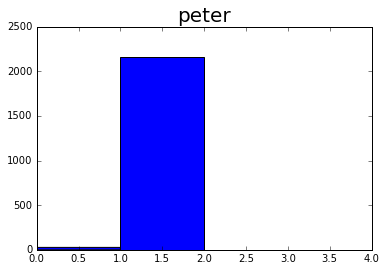

Counter({0: 27, 1: 2165})

KeyboardInterrupt: 

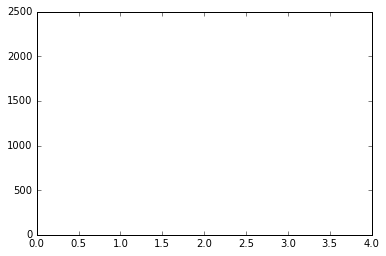

In [578]:
for k in g.test_word_topics.keys():
    print k
    plt.hist(g.test_word_topics[k], 4, (0,4))
    print Counter(g.test_word_topics[k])
    plt.title(k, size=20)
    display.clear_output(wait=True)
    display.display(plt.gcf(), Counter(g.test_word_topics[k]))
    plt.cla()
    time.sleep(1.0)

### TODO:
Run tests:

- check that on first doc in first iteration: words are assigned to right topic
- check Das output again